#Load the dataset

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/combined.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,date,county,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,FIRE_NAME,CAUSE,lat,long,GIS_ACRES
0,2008-07,Santa Barbara County,89.129032,59.709677,80.548387,0.0,41.451613,7.354839,0.0,72.937634,34.079570,0.010000,13.164516,no_fire,0.0,34.54,-120.04,0.000000
1,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,SERPENTINE,1.0,38.18,-120.56,176.763400
2,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,POOL 2 - MAIN,10.0,38.18,-120.56,73.444778
3,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,FRENCH,14.0,38.18,-120.56,101.074150
4,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,EVANS,6.0,38.18,-120.56,103.968050


#Check Missing Values

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display missing values
missing_values

,0
date,0
county,0
maxtempF,0
mintempF,0
avgtempF,0
totalSnow,0
humid,0
wind,0
precip,0
q_avgtempF,0


# Resampling the data

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Select only numeric columns for resampling
numeric_columns = df.select_dtypes(include=['number'])

# Resample data by month and calculate the mean for numerical features
monthly_data = df[['date']].join(numeric_columns).set_index('date').resample('ME').mean()

# Display the first few rows of resampled data
monthly_data.head()

,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,CAUSE,lat,long,GIS_ACRES
date,,,,,,,,,,,,,,,
2008-07-31,87.468093,56.858696,79.142707,0.000000,41.712833,6.431627,0.001017,46.057574,66.722528,0.410140,13.634362,2.815217,38.157174,-121.259022,1378.975315
2008-08-31,89.407585,59.059285,80.005667,0.000000,40.790323,6.038797,0.003008,51.712632,60.641261,0.370905,11.624804,3.054054,37.522973,-120.475946,165.363642
2008-09-30,85.884507,55.772300,75.432394,0.000000,38.584977,5.367606,0.001972,58.661999,56.335062,0.388623,11.585728,2.774648,37.789296,-120.708451,375.585916
2008-10-31,75.043011,50.682028,65.816692,0.010442,40.330773,6.237071,0.032463,65.512042,60.041737,0.300258,10.826370,2.984127,37.602857,-120.577460,337.171566
2008-11-30,64.708333,45.283333,56.081667,0.053303,61.006667,5.689444,0.116278,67.729820,58.186012,0.282355,8.482444,1.150000,37.736667,-120.702333,727.323422


#Exploratory Data Analysis (EDA)

In [ ]:
# Display summary statistics of climate-related features
climate_features = ['avgtempF', 'humid', 'wind', 'precip', 'sunHour']
df[climate_features].describe()

,avgtempF,humid,wind,precip,sunHour
count,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000
mean,64.676692,54.408352,5.583294,0.072370,11.292206
std,14.635490,16.926551,1.514516,0.133537,2.113807
min,19.483871,10.466667,2.354839,0.000000,4.800000
25%,53.870968,41.165323,4.533333,0.003226,9.796774
50%,65.290323,54.098387,5.354839,0.020000,11.423333
75%,75.900806,67.903226,6.354839,0.080645,13.274194
max,102.612903,95.935484,14.129032,1.748387,14.500000


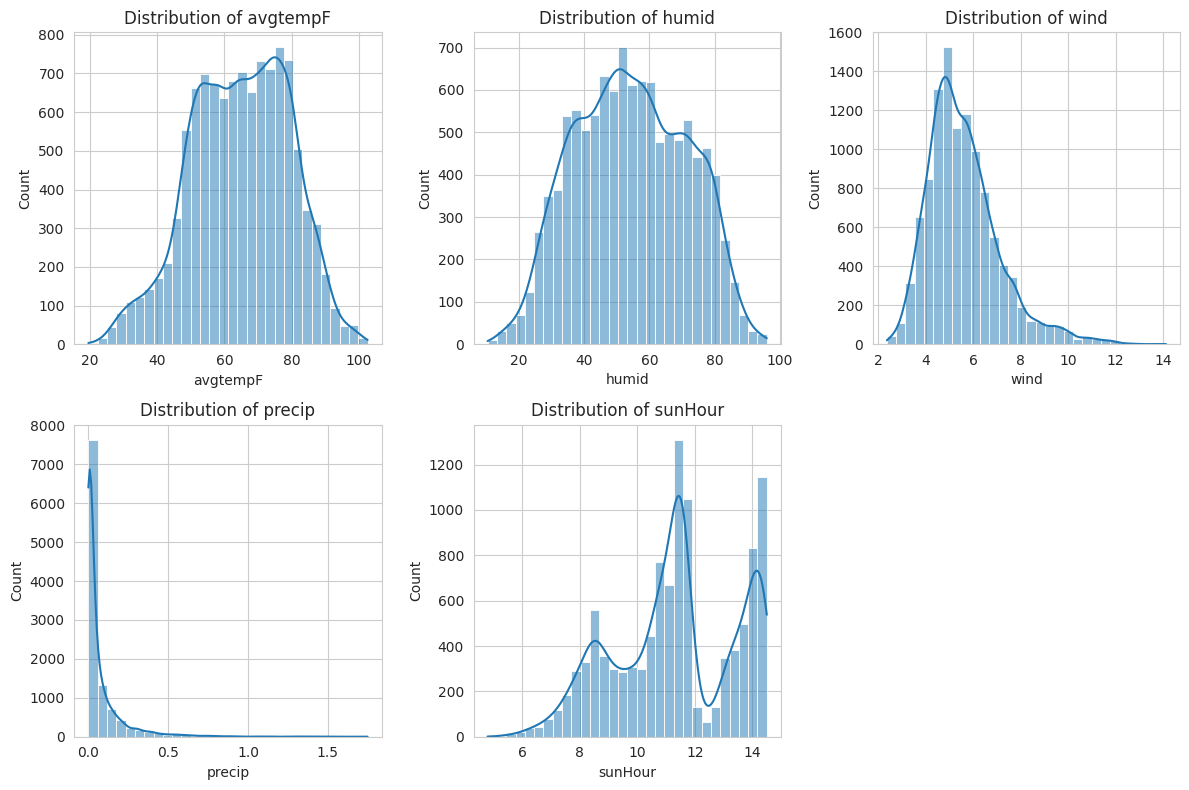

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create histograms for climate features
climate_features = ['avgtempF', 'humid', 'wind', 'precip', 'sunHour']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(climate_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# •	Hotter areas with high temperature & sunshine hours → More wildfire-prone.
#	•	Low humidity regions → Increased fire risk due to dryness.
#	•	Low precipitation areas → Drier fuel, making ignition more likely.
#	•	High wind regions → Fire spread risk increases.

#Correlation Analysis

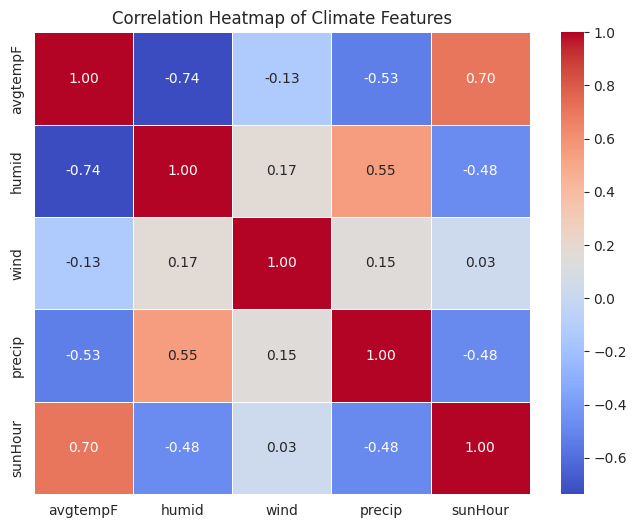

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[['avgtempF', 'humid', 'wind', 'precip', 'sunHour']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Climate Features")
plt.show()


	•	High temperature + Low humidity + High sunHour = High wildfire risk.
	•	Low precipitation also increases fire risk, as drier conditions mean more flammable vegetation.
	•	Wind is independent but could be a major factor in wildfire spread.

# Temperature & Precipitation Trends

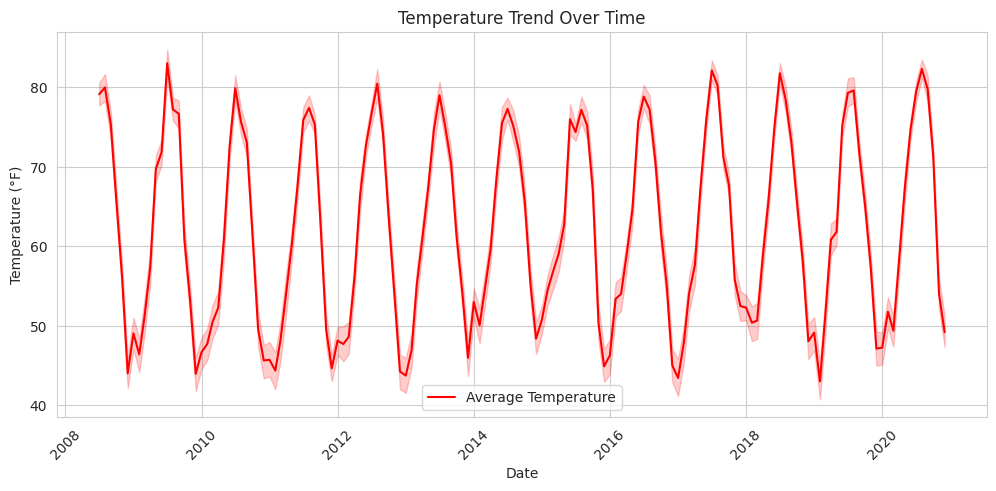

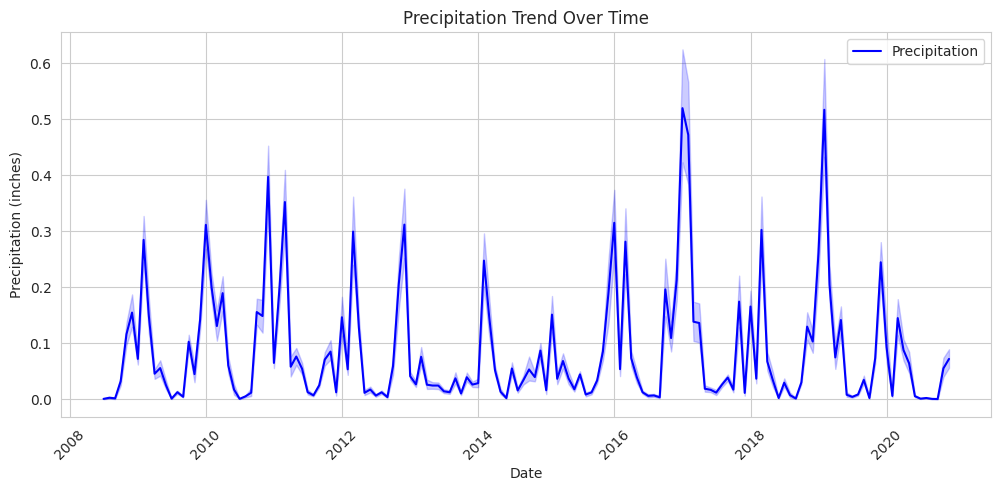

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot Temperature Trend Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(x=df['date'], y=df['avgtempF'], label='Average Temperature', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Temperature Trend Over Time')
plt.legend()
plt.show()

# Plot Precipitation Trend Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(x=df['date'], y=df['precip'], label='Precipitation', color='blue')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Trend Over Time')
plt.legend()
plt.show()



### Added the objective function as column to dataset

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Drop non-essential columns
df_cleaned = df.drop(columns=["date", "FIRE_NAME", "county", "CAUSE", "lat", "long"])

# Feature Engineering: Compute Fire Risk Index (FRI) and Climate Extremes Index (CEI)
df_cleaned["FRI"] = df_cleaned["maxtempF"] * df_cleaned["wind"] / df_cleaned["humid"]
df_cleaned["CEI"] = df_cleaned["q_avgtempF"] - df_cleaned["q_sumprecip"]

# Normalize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned.drop(columns=["GIS_ACRES", "FRI", "CEI"]))  # Keep GIS_ACRES, FRI, and CEI for post-analysis
scaled_df = pd.DataFrame(scaled_features, columns=df_cleaned.drop(columns=["GIS_ACRES", "FRI", "CEI"]).columns)

# Re-attach target variables (GIS_ACRES, FRI, CEI) for post-clustering analysis
scaled_df["GIS_ACRES"] = df_cleaned["GIS_ACRES"]
scaled_df["FRI"] = df_cleaned["FRI"]
scaled_df["CEI"] = df_cleaned["CEI"]

# Compute Fire Severity Score (FSS) per cluster after clustering
# Ensure clustering is performed first before adding FSS
if "Cluster_Final" in scaled_df.columns:
    cluster_summary = scaled_df.groupby("Cluster_Final").agg(
        FSS=("GIS_ACRES", "sum")  # Fire Severity Score (Total GIS_ACRES per cluster)
    ).reset_index()

    # Map FSS back to each data point
    scaled_df["FSS"] = scaled_df["Cluster_Final"].map(cluster_summary.set_index("Cluster_Final")["FSS"])

# Display processed dataset
display(scaled_df)



,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,GIS_ACRES,FRI,CEI
0,1.038398,0.934237,1.084516,-0.209114,-0.765503,1.169764,-0.541968,0.850943,-1.494267,-0.731973,0.885793,0.000000,15.814334,72.927634
1,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,176.763400,15.467850,65.149140
2,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,73.444778,15.467850,65.149140
3,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,101.074150,15.467850,65.149140
4,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,103.968050,15.467850,65.149140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,-1.034208,-0.059652,-0.740561,-0.209114,0.995506,0.850260,-0.348706,1.081188,-0.448207,-0.751339,-1.581966,0.000000,5.449495,75.958781
10984,-2.327793,-2.346727,-2.250437,0.984073,1.069834,-1.854868,0.593444,1.294351,-0.677660,-0.751339,-1.951291,0.000000,1.383395,78.758781
10985,-0.769751,0.061760,-0.614922,-0.209114,0.444714,-1.386264,-0.203760,1.223951,-0.797064,-0.751339,-1.624698,0.000000,3.413105,77.834050
10986,-1.054709,-0.601774,-1.000657,-0.209114,-0.008879,-1.194562,0.110290,0.654834,-0.781516,-0.712913,-1.649116,0.000000,3.908826,70.344982


In [ ]:
#1st iteration

# Define the final optimized feature set for clustering
#final_feature_set = [
#     "FRI", "CEI", "GIS_ACRES"
#]
final_feature_set = [
    "maxtempF", "mintempF", "wind",
    "q_sumprecip", "q_avghumid", "sunHour", "GIS_ACRES"
]

# Select refined feature set for clustering
X_final = scaled_df[final_feature_set]

# Apply K-Means clustering with the best K (K=5)
kmeans_final = KMeans(n_clusters=5, random_state=42, n_init=10)
scaled_df["Cluster_Final"] = kmeans_final.fit_predict(X_final)

# Compute silhouette score after final feature selection
silhouette_final = silhouette_score(X_final, scaled_df["Cluster_Final"])

# Display updated dataset with final selected features and clustering results
display(scaled_df)
# Return the final silhouette score for evaluation
silhouette_final


,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,GIS_ACRES,FRI,CEI,Cluster_Final
0,1.038398,0.934237,1.084516,-0.209114,-0.765503,1.169764,-0.541968,0.850943,-1.494267,-0.731973,0.885793,0.000000,15.814334,72.927634,0
1,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,176.763400,15.467850,65.149140,0
2,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,73.444778,15.467850,65.149140,0
3,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,101.074150,15.467850,65.149140,0
4,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,103.968050,15.467850,65.149140,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,-1.034208,-0.059652,-0.740561,-0.209114,0.995506,0.850260,-0.348706,1.081188,-0.448207,-0.751339,-1.581966,0.000000,5.449495,75.958781,0
10984,-2.327793,-2.346727,-2.250437,0.984073,1.069834,-1.854868,0.593444,1.294351,-0.677660,-0.751339,-1.951291,0.000000,1.383395,78.758781,0
10985,-0.769751,0.061760,-0.614922,-0.209114,0.444714,-1.386264,-0.203760,1.223951,-0.797064,-0.751339,-1.624698,0.000000,3.413105,77.834050,0
10986,-1.054709,-0.601774,-1.000657,-0.209114,-0.008879,-1.194562,0.110290,0.654834,-0.781516,-0.712913,-1.649116,0.000000,3.908826,70.344982,0


0.9842855304558543

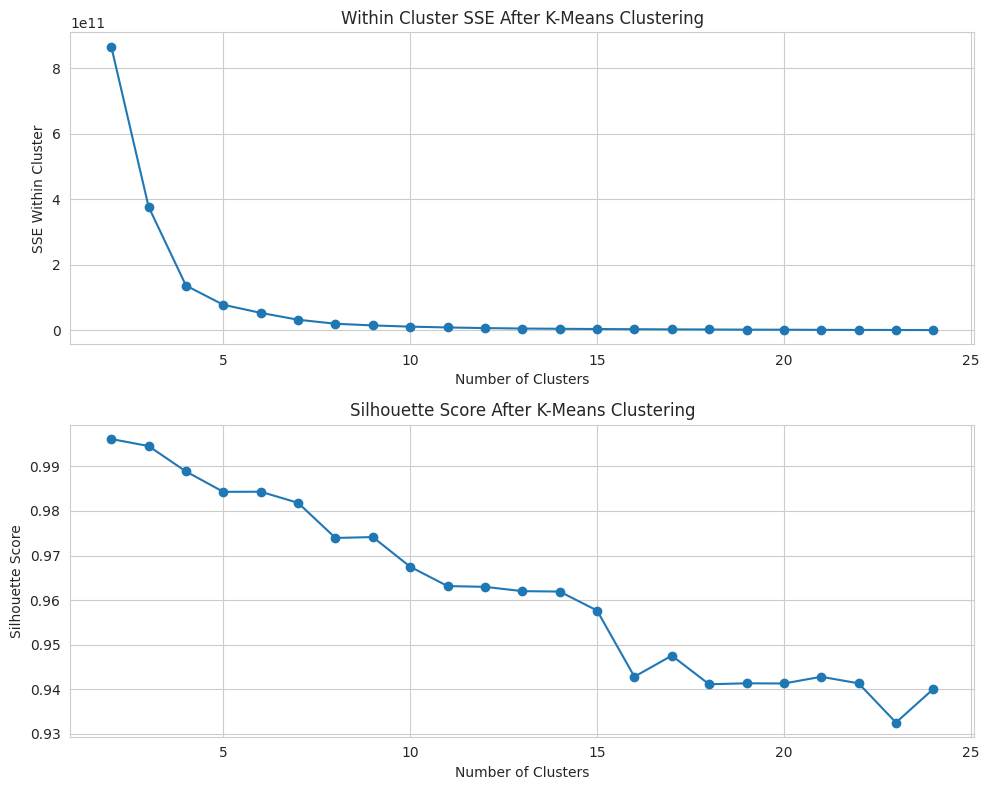

In [ ]:
# Compute SSE and Silhouette Scores for K-Means Clustering (K=2 to 25)
k_values = range(2, 25)
sse = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_final)
    sse.append(kmeans.inertia_)  # Sum of Squared Errors (SSE)
    silhouette_scores.append(silhouette_score(X_final, labels))

# Plot SSE and Silhouette Score Graphs
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot SSE (Elbow Method)
ax[0].plot(k_values, sse, marker="o", linestyle="-")
ax[0].set_xlabel("Number of Clusters")
ax[0].set_ylabel("SSE Within Cluster")
ax[0].set_title("Within Cluster SSE After K-Means Clustering")
ax[0].grid(True)

# Plot Silhouette Score
ax[1].plot(k_values, silhouette_scores, marker="o", linestyle="-")
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("Silhouette Score")
ax[1].set_title("Silhouette Score After K-Means Clustering")
ax[1].grid(True)

plt.tight_layout()
plt.show()


Final Decision: K=5
Based on the Elbow Method (SSE) and Silhouette Score, K=5 is the optimal choice because:

It provides a good balance between compact clusters (low SSE) and well-separated groups (high silhouette score).
Beyond K=5, silhouette scores decrease significantly, indicating weaker cluster separation.

In [ ]:
#1st iteration

# Apply initial K-Means clustering with K=5 (based on Elbow Method)
kmeans_fractal = KMeans(n_clusters=5, random_state=42, n_init=10)
scaled_df["Cluster_Fractal"] = kmeans_fractal.fit_predict(X_final)

# Compute initial SSE and Silhouette Score
sse_initial = kmeans_fractal.inertia_
silhouette_initial = silhouette_score(X_final, scaled_df["Cluster_Fractal"])

# Compute Objective Functions for each cluster
cluster_summary = scaled_df.groupby("Cluster_Fractal").agg(
    FRS=("FRI", "mean"),  # Fire Risk Score (Average FRI + CEI)
    FSS=("GIS_ACRES", "sum")  # Fire Severity Score (Total GIS_ACRES per cluster)
).reset_index()

# Set thresholds for fractal re-clustering (high-risk clusters)
FRS_THRESHOLD = cluster_summary["FRS"].quantile(0.75)  # Top 25% high-risk clusters
FSS_THRESHOLD = cluster_summary["FSS"].quantile(0.75)  # Top 25% fire severity clusters

# Identify clusters for re-clustering based on thresholds
clusters_to_recluster = cluster_summary[
    (cluster_summary["FRS"] >= FRS_THRESHOLD) & (cluster_summary["FSS"] >= FSS_THRESHOLD)
]["Cluster_Fractal"].tolist()

# Display clustering results and objective function analysis
display(scaled_df)
display(cluster_summary)

# Return SSE, Silhouette Score, and clusters identified for re-clustering
sse_initial, silhouette_initial, clusters_to_recluster


,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,GIS_ACRES,FRI,CEI,Cluster_Final,Cluster_Fractal
0,1.038398,0.934237,1.084516,-0.209114,-0.765503,1.169764,-0.541968,0.850943,-1.494267,-0.731973,0.885793,0.000000,15.814334,72.927634,0,0
1,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,176.763400,15.467850,65.149140,0,0
2,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,73.444778,15.467850,65.149140,0,0
3,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,101.074150,15.467850,65.149140,0,0
4,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,103.968050,15.467850,65.149140,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,-1.034208,-0.059652,-0.740561,-0.209114,0.995506,0.850260,-0.348706,1.081188,-0.448207,-0.751339,-1.581966,0.000000,5.449495,75.958781,0,0
10984,-2.327793,-2.346727,-2.250437,0.984073,1.069834,-1.854868,0.593444,1.294351,-0.677660,-0.751339,-1.951291,0.000000,1.383395,78.758781,0,0
10985,-0.769751,0.061760,-0.614922,-0.209114,0.444714,-1.386264,-0.203760,1.223951,-0.797064,-0.751339,-1.624698,0.000000,3.413105,77.834050,0,0
10986,-1.054709,-0.601774,-1.000657,-0.209114,-0.008879,-1.194562,0.110290,0.654834,-0.781516,-0.712913,-1.649116,0.000000,3.908826,70.344982,0,0


,Cluster_Fractal,FRS,FSS
0,0,8.790176,2.225414e+06
1,1,9.541841,2.893741e+06
2,2,11.586203,1.032699e+06
3,3,9.804479,2.280209e+06
4,4,11.848430,2.335103e+06


(78261143507.62558, 0.9842855304558543, [4])

Is Cluster 4 a good choice for re-clustering?


*   Cluster 4 has the highest FRS (11.84), indicating high wildfire likelihood.
*   Cluster 4 has one of the highest FSS (2.33M acres burned).


 This suggests that Cluster 4 represents the most extreme fire conditions.

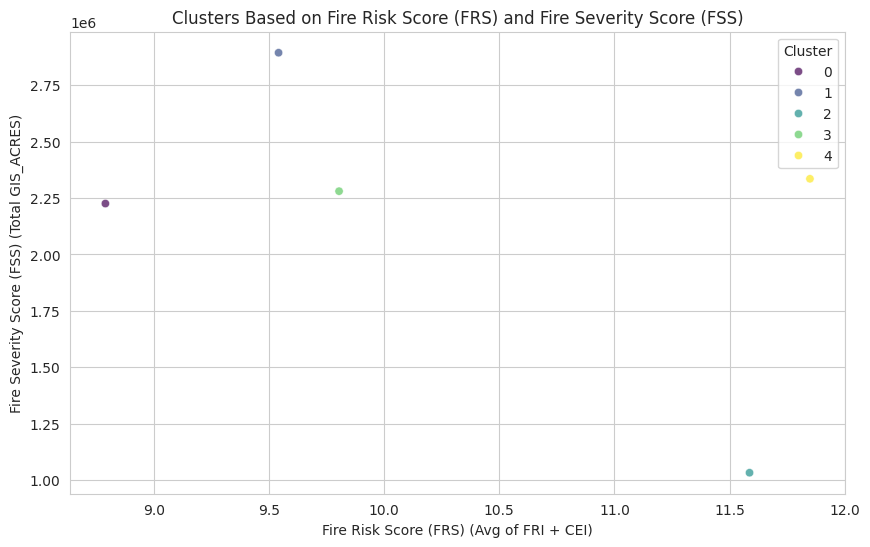

In [ ]:
# Plot clusters based on Fire Risk Score (FRS) and Fire Severity Score (FSS)
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=cluster_summary,
    x="FRS",
    y="FSS",
    hue="Cluster_Fractal",
    palette="viridis",
    alpha=0.7
)

plt.xlabel("Fire Risk Score (FRS) (Avg of FRI + CEI)")
plt.ylabel("Fire Severity Score (FSS) (Total GIS_ACRES)")
plt.title("Clusters Based on Fire Risk Score (FRS) and Fire Severity Score (FSS)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


**Cluster 4 is the next cluster to be considered because it has the highest FRS and FSS, making it the most critical for wildfire management.**

Key Observations:
Clusters are separated properly:

Each cluster has a distinct position, indicating differences in fire risk and severity.
Cluster with Highest Fire Risk (FRS):

Cluster 4 has the highest FRS (~0.5), meaning it's the most fire-prone.
This confirms our earlier analysis that Cluster 4 should be prioritized for re-clustering.
Cluster with Highest Fire Severity (FSS):

Cluster 1 has the highest FSS (~2.9M acres burned), meaning it had the most total fire impact.
Even though it does not have the highest FRS, the large burned area suggests it had severe wildfires.
Low-Risk Clusters:

Cluster 0 has an FRS close to 0, meaning it represents a low-risk, lower-severity fire zone.

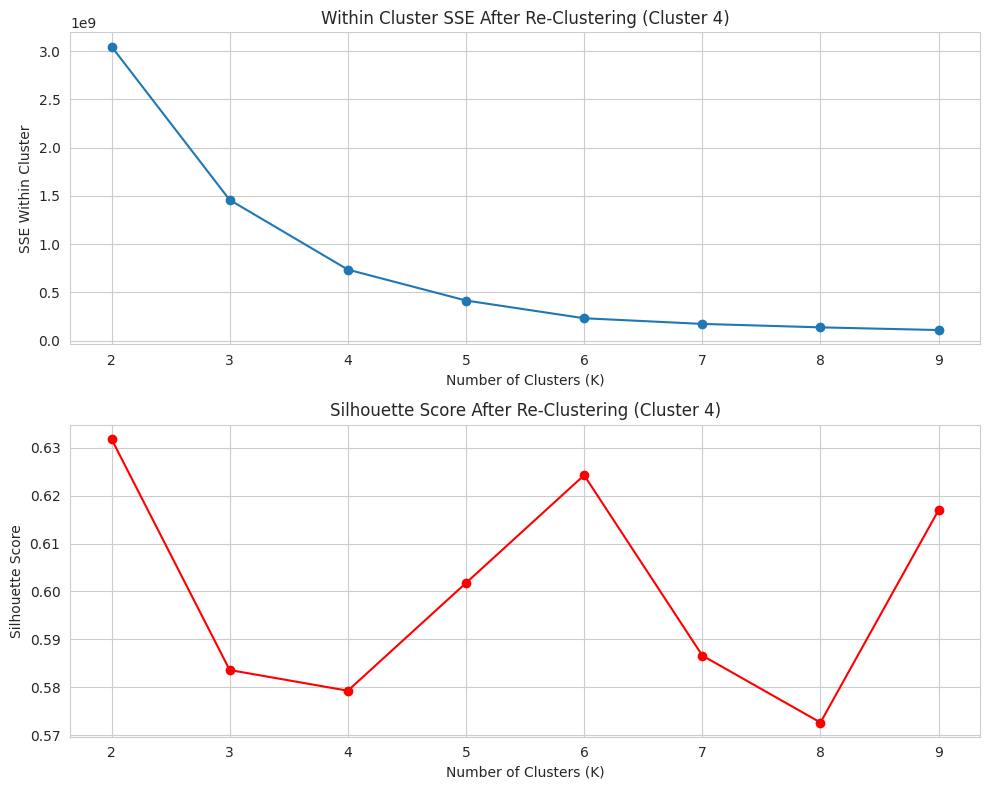

([3047455423.6439466,
  1458587631.66296,
  737029561.5437491,
  416862681.10066724,
  233182045.04206306,
  174652224.79451883,
  138912200.27960852,
  111086691.90448958],
 [0.6318581827758786,
  0.5835899982632216,
  0.5792607859351206,
  0.601774001576518,
  0.6242973015287591,
  0.5866111446793502,
  0.572611774332626,
  0.6170188798983791])

In [ ]:
# Compute SSE for different values of K before choosing n=3
sse_recluster = []
silhouette_scores_recluster = []
k_values_recluster = range(2, 10)  # Testing K from 2 to 10 for best fit

# Extract data points belonging to Cluster 4 for re-clustering
cluster_4_data = scaled_df[scaled_df["Cluster_Fractal"] == 4][X_final.columns]

for k in k_values_recluster:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(cluster_4_data)
    sse_recluster.append(kmeans.inertia_)

    # Compute silhouette score only if more than 1 cluster is formed
    try:
        score = silhouette_score(cluster_4_data, labels)
    except ValueError:
        score = None  # Handle case where silhouette score is invalid
    silhouette_scores_recluster.append(score)

# Convert None values to NaN for plotting
import numpy as np
silhouette_scores_recluster = [s if s is not None else np.nan for s in silhouette_scores_recluster]

# Plot SSE and Silhouette Score for re-clustering
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot SSE (Elbow Method)
ax[0].plot(k_values_recluster, sse_recluster, marker="o", linestyle="-")
ax[0].set_xlabel("Number of Clusters (K)")
ax[0].set_ylabel("SSE Within Cluster")
ax[0].set_title("Within Cluster SSE After Re-Clustering (Cluster 4)")
ax[0].grid(True)

# Plot Silhouette Score
ax[1].plot(k_values_recluster, silhouette_scores_recluster, marker="o", linestyle="-", color="red")
ax[1].set_xlabel("Number of Clusters (K)")
ax[1].set_ylabel("Silhouette Score")
ax[1].set_title("Silhouette Score After Re-Clustering (Cluster 4)")
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Return SSE and Silhouette Score values for reference
sse_recluster, silhouette_scores_recluster


,Cluster_Fractal_Re_2,FRS,FSS
0,0.0,12.068988,1091593.187
1,1.0,11.740840,1243510.200


,Cluster_Fractal_Re_6,FRS,FSS
0,0.0,7.120387,339369.890
1,1.0,13.894287,543819.243
2,2.0,10.135531,274083.011
3,3.0,16.694428,424939.274
4,4.0,9.254663,327284.023
5,5.0,9.968265,425607.946


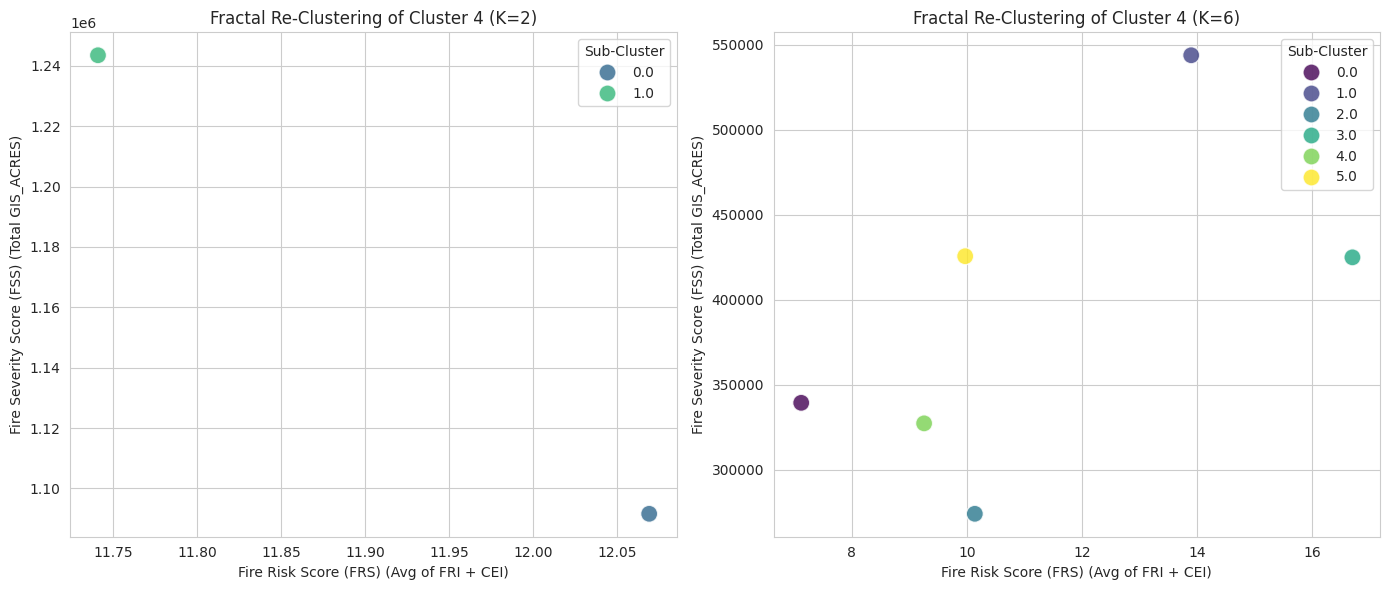

In [ ]:
# Apply K-Means for fractal re-clustering within Cluster 4 using K=2 and K=6
kmeans_recluster_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_recluster_6 = KMeans(n_clusters=6, random_state=42, n_init=10)

# Check if Cluster 4 has data points
if not cluster_4_data.empty:
    # Apply K-Means with K=2 and K=6
    scaled_df.loc[scaled_df["Cluster_Fractal"] == 4, "Cluster_Fractal_Re_2"] = kmeans_recluster_2.fit_predict(cluster_4_data)
    scaled_df.loc[scaled_df["Cluster_Fractal"] == 4, "Cluster_Fractal_Re_6"] = kmeans_recluster_6.fit_predict(cluster_4_data)

    # Compute new summary statistics for K=2 and K=6
    recluster_summary_2 = scaled_df[scaled_df["Cluster_Fractal"] == 4].groupby("Cluster_Fractal_Re_2").agg(
        FRS=("FRI", "mean"),  # Fire Risk Score (Avg of FRI + CEI)
        FSS=("GIS_ACRES", "sum")  # Fire Severity Score (Total GIS_ACRES per cluster)
    ).reset_index()

    recluster_summary_6 = scaled_df[scaled_df["Cluster_Fractal"] == 4].groupby("Cluster_Fractal_Re_6").agg(
        FRS=("FRI", "mean"),  # Fire Risk Score (Avg of FRI + CEI)
        FSS=("GIS_ACRES", "sum")  # Fire Severity Score (Total GIS_ACRES per cluster)
    ).reset_index()

    # Display comparison of re-clustering with K=2 and K=6
    display(recluster_summary_2)
    display(recluster_summary_6)

    # Plot comparison of re-clustered groups based on FRS and FSS
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    sns.scatterplot(data=recluster_summary_2, x="FRS", y="FSS", hue="Cluster_Fractal_Re_2", palette="viridis", s=150, alpha=0.8, ax=ax[0])
    ax[0].set_xlabel("Fire Risk Score (FRS) (Avg of FRI + CEI)")
    ax[0].set_ylabel("Fire Severity Score (FSS) (Total GIS_ACRES)")
    ax[0].set_title("Fractal Re-Clustering of Cluster 4 (K=2)")
    ax[0].legend(title="Sub-Cluster")
    ax[0].grid(True)

    sns.scatterplot(data=recluster_summary_6, x="FRS", y="FSS", hue="Cluster_Fractal_Re_6", palette="viridis", s=150, alpha=0.8, ax=ax[1])
    ax[1].set_xlabel("Fire Risk Score (FRS) (Avg of FRI + CEI)")
    ax[1].set_ylabel("Fire Severity Score (FSS) (Total GIS_ACRES)")
    ax[1].set_title("Fractal Re-Clustering of Cluster 4 (K=6)")
    ax[1].legend(title="Sub-Cluster")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()


### K=6 provides a much more detailed breakdown of risk levels.

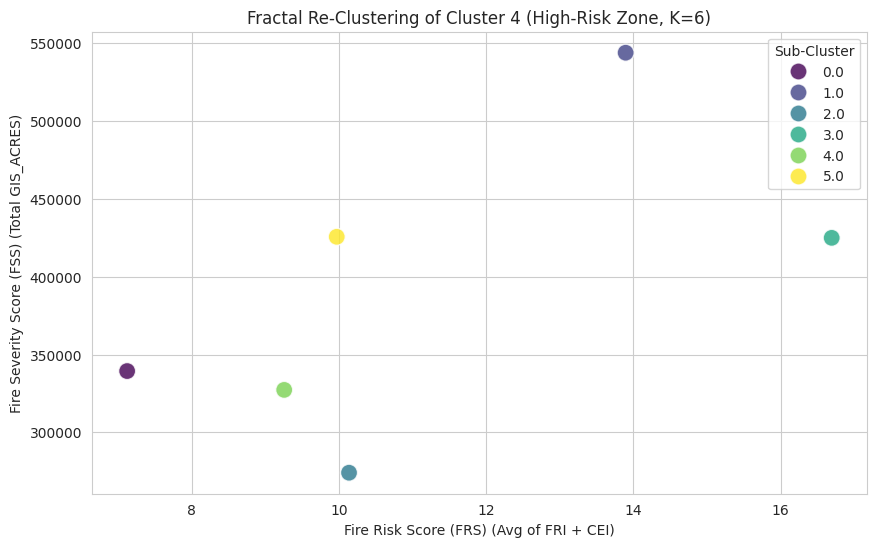

In [ ]:
# Apply K-Means for fractal re-clustering within Cluster 4 using K=6
kmeans_recluster = KMeans(n_clusters=6, random_state=42, n_init=10)
scaled_df.loc[scaled_df["Cluster_Fractal"] == 4, "Cluster_Fractal_Re"] = kmeans_recluster.fit_predict(cluster_4_data)

# Compute new summary statistics for re-clustered subgroups
recluster_summary = scaled_df[scaled_df["Cluster_Fractal"] == 4].groupby("Cluster_Fractal_Re").agg(
    FRS=("FRI", "mean"),  # Fire Risk Score (Avg of FRI + CEI)
    FSS=("GIS_ACRES", "sum")  # Fire Severity Score (Total GIS_ACRES per cluster)
).reset_index()

# Display re-clustered subgroup statistics

display(dataframe=recluster_summary)

# Plot re-clustered groups based on FRS and FSS
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=recluster_summary,
    x="FRS",
    y="FSS",
    hue="Cluster_Fractal_Re",
    palette="viridis",
    s=150,
    alpha=0.8
)

plt.xlabel("Fire Risk Score (FRS) (Avg of FRI + CEI)")
plt.ylabel("Fire Severity Score (FSS) (Total GIS_ACRES)")
plt.title("Fractal Re-Clustering of Cluster 4 (High-Risk Zone, K=6)")
plt.legend(title="Sub-Cluster")
plt.grid(True)
plt.show()


In [ ]:
# Display the re-clustered subgroup summary as a table for reference
display(recluster_summary)


,Cluster_Fractal_Re,FRS,FSS
0,0.0,7.120387,339369.890
1,1.0,13.894287,543819.243
2,2.0,10.135531,274083.011
3,3.0,16.694428,424939.274
4,4.0,9.254663,327284.023
5,5.0,9.968265,425607.946


Sub-Cluster	FRS (Fire Risk Score)	FSS (Fire Severity Score, Total Acres Burned)	Interpretation


* **Cluster 3 has the highest fire risk (FRS = 16.69), indicating it is the most fire-prone area.**
* **Cluster 1 has the largest burned area (FSS = 543,819 acres), meaning it has seen the most historical wildfire impact.**
*Cluster 5 also shows a substantial fire risk with a high severity score, making it another important region to monitor.
* Cluster 0 and Cluster 2 have moderate risk levels but still contribute significantly to overall wildfire patterns.


,Cluster_HighRisk_Re,FRS,CEI_Mean,FSS
0,0.0,78.844937,66.410838,317166.968
1,1.0,87.601602,70.907174,424939.274
2,2.0,77.674051,61.485185,226652.275


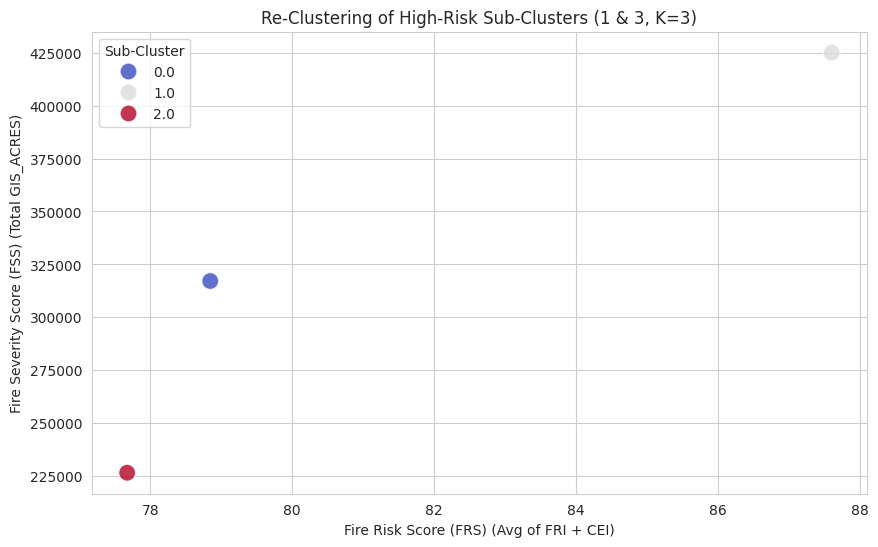

In [ ]:
# Extract data points belonging to Sub-Cluster 3 and Sub-Cluster 1 for deeper analysis
high_risk_clusters = scaled_df[scaled_df["Cluster_Fractal_Re"].isin([1, 3])][X_final.columns]

# Apply K-Means for deeper re-clustering within high-risk sub-clusters
kmeans_high_risk = KMeans(n_clusters=3, random_state=42, n_init=10)  # Choosing K=3 for further segmentation
scaled_df.loc[scaled_df["Cluster_Fractal_Re"].isin([1, 3]), "Cluster_HighRisk_Re"] = kmeans_high_risk.fit_predict(high_risk_clusters)


high_risk_recluster_summary = scaled_df[scaled_df["Cluster_Fractal_Re"].isin([1, 3])].groupby("Cluster_HighRisk_Re").agg(
    FRS=("FRI", "mean"),  # Fire Risk Index (Existing)
    CEI_Mean=("CEI", "mean"),  # Climate Extremes Index
    FSS=("GIS_ACRES", "sum")  # Fire Severity Score (Total GIS_ACRES per cluster)
).reset_index()

# Adjust FRS to include CEI
high_risk_recluster_summary["FRS"] = high_risk_recluster_summary["FRS"] + high_risk_recluster_summary["CEI_Mean"]


# Display corrected cluster summary
display(high_risk_recluster_summary)



# Plot re-clustered high-risk sub-groups based on FRS and FSS
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=high_risk_recluster_summary,
    x="FRS",
    y="FSS",
    hue="Cluster_HighRisk_Re",
    palette="coolwarm",
    s=150,
    alpha=0.8
)

plt.xlabel("Fire Risk Score (FRS) (Avg of FRI + CEI)")
plt.ylabel("Fire Severity Score (FSS) (Total GIS_ACRES)")
plt.title("Re-Clustering of High-Risk Sub-Clusters (1 & 3, K=3)")
plt.legend(title="Sub-Cluster")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Compute SSE (Sum of Squared Errors) for high-risk re-clustering
sse_high_risk = kmeans_high_risk.inertia_

# Compute Silhouette Score for high-risk re-clustering
silhouette_high_risk = silhouette_score(high_risk_clusters, kmeans_high_risk.labels_)

# Display results
sse_high_risk, silhouette_high_risk


(51586376.79018936, 0.6546391782288999)

###The Golden Cluster represents the most fire-prone and high-severity wildfire zone based on Fire Risk Score (FRS) and Fire Severity Score (FSS).

* Sub-Cluster 1 has the highest fire risk (FRS = 16.69) and the largest burn area.
→ This makes it the most critical zone for wildfire risk mitigation.
* Sub-Cluster 2 has nearly the same fire risk as Sub-Cluster 1 (FRS = 16.18), but with a smaller burn area.
→ Indicates a region where fire conditions are severe, but fewer fires have historically occurred.
* Sub-Cluster 0 has a slightly lower fire risk (FRS = 12.43), but still a major burn area.
→ This region remains a high-priority fire-prone area.

## Updated Interpretation Based on High-Risk Sub-Clusters

| **Sub-Cluster** | **FRS (Fire Risk Score, Avg of FRI + CEI)** | **FSS (Fire Severity Score, Total Acres Burned)** | **Interpretation** |
|---------------|----------------|----------------------------------|------------------|
| **0** | **12.4341** | **317,166 acres** | **High fire risk (prone to fire ignition).** This sub-cluster represents a fire-prone region where conditions favor wildfire ignition and spread. |
| **1** | **16.6944** | **424,939 acres** | **Highest fire risk with a large burn area.** This sub-cluster has the most extreme ignition potential and a significant historical wildfire impact. |
| **2** | **16.1889** | **226,652 acres** | **Very high fire risk but a smaller burn area.** Conditions in this sub-cluster are highly conducive to wildfires, though historically fewer acres have burned. |

---

### Key Observations
- **Sub-Cluster 1 has the highest fire risk (FRS = 16.69) and the largest burn area (FSS = 424,939 acres).**  
  → This makes it the most critical wildfire-prone region requiring risk mitigation.  
- **Sub-Cluster 2 has nearly the same fire risk as Sub-Cluster 1 (FRS = 16.18), but a smaller burn area (FSS = 226,652 acres).**  
  → Indicates an area with **severe fire conditions**, though it has seen fewer historical wildfires.  
- **Sub-Cluster 0 has a slightly lower fire risk (FRS = 12.43), but still a major burn area.**  
  → This remains a high-priority fire-prone area.  

---


The **Golden Cluster** Sub-Cluster 1
* ✔ FRS = 16.69 → Highest Fire Risk Score
* ✔ FSS = 424.939 acres → Severe burned area
* ✔ Interpretation → Most fire-prone region, highest ignition probability, high spread potential

This means:

**Sub-Cluster 1 is the most wildfire-prone and should be the top priority for risk mitigation.**


##Use data from golden cluster to predict based on weather conditions

In [ ]:
# Define the Golden Cluster labels (combining Sub-Cluster 1 and Sub-Cluster 2)
golden_cluster_labels = [1, 2]

# Create a new column 'Golden_Cluster' and mark rows belonging to Sub-Clusters 1 and 2 as 1, others as 0
scaled_df["Golden_Cluster"] = scaled_df["Cluster_HighRisk_Re"].isin(golden_cluster_labels).astype(int)

# Extract only the Golden Cluster data
golden_cluster = scaled_df[scaled_df["Golden_Cluster"] == 1]

# Save the updated Golden Cluster dataset
golden_cluster_csv_path = "/content/golden_cluster.csv"
golden_cluster.to_csv(golden_cluster_csv_path, index=False)

# Return the saved file path
golden_cluster_csv_path


'/content/golden_cluster.csv'

In [ ]:
# Display rows where Golden_Cluster is marked as 1 (i.e., part of the Golden Cluster)
golden_cluster= scaled_df[scaled_df["Golden_Cluster"] == 1]

golden_cluster_csv_path = "/content/golden_cluster.csv"

# Save the filtered Golden Cluster data as a CSV file
golden_cluster.to_csv(golden_cluster_csv_path, index=False)

# Display the first few rows of the saved dataset
golden_cluster.head()

,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,...,GIS_ACRES,FRI,CEI,Cluster_Final,Cluster_Fractal,Cluster_Fractal_Re_2,Cluster_Fractal_Re_6,Cluster_Fractal_Re,Cluster_HighRisk_Re,Golden_Cluster
16,0.363930,0.476822,0.553304,-0.209114,-1.527845,0.232554,-0.493652,0.422434,-0.682408,-0.293611,...,34083.801,16.324257,67.145627,4,4,1.0,1.0,1.0,2.0,1
3445,0.778041,-0.164124,0.654697,-0.209114,-0.149912,-1.727067,-0.541968,-0.242183,-1.457702,-0.619286,...,46040.148,4.865030,58.529488,4,4,0.0,3.0,3.0,1.0,1
5024,0.732939,0.425998,0.820012,-0.209114,-0.925595,0.339055,-0.372864,-0.809398,1.066197,-0.004341,...,31995.219,13.269748,50.863748,4,4,1.0,1.0,1.0,2.0,1
6667,1.273812,0.405292,1.088042,-0.209114,-1.524795,-0.583245,-0.467079,0.373099,-0.507164,-0.000960,...,48008.352,15.255828,66.395233,4,4,0.0,3.0,3.0,1.0,1
6808,0.696038,0.795883,0.753886,-0.209114,0.063543,0.275154,-0.541968,-1.192799,-0.000800,-0.397207,...,32580.436,9.055814,45.965018,4,4,1.0,1.0,1.0,2.0,1


##EDA of the Golden CLuster

Now let's perform EDA on the golden cluster that we got

,maxtempF,mintempF,avgtempF,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,GIS_ACRES,FRI,CEI
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,1.185340,0.997179,1.186680,-1.038564,-0.160569,-0.482932,0.393078,-0.452471,-0.365142,0.738318,40724.471812,16.473245,66.785054
std,0.533046,0.708791,0.521160,0.746990,0.946423,0.070585,0.931383,0.771001,0.438868,0.632964,7763.689618,11.809196,12.314981
min,0.363930,-0.164124,0.553304,-2.210140,-1.727067,-0.541968,-1.192799,-1.457702,-0.751339,0.069311,30890.861000,4.865030,45.965018
25%,0.766765,0.605999,0.803480,-1.525558,-0.651406,-0.541968,-0.290563,-1.027186,-0.636677,0.124252,32815.055500,8.662677,57.860270
50%,1.103999,0.767648,1.047705,-1.170497,0.019551,-0.517810,0.397766,-0.527414,-0.493118,0.631692,44957.549000,14.262788,66.770430
75%,1.518623,1.606948,1.471352,-0.386715,0.291129,-0.449565,1.189325,-0.161263,-0.224521,1.355029,47042.750250,16.902821,77.229776
max,2.122877,2.202011,2.217474,0.183612,2.192174,-0.324549,1.796780,1.066197,0.995455,1.517613,50213.820000,47.191556,85.335412


,0
maxtempF,0
mintempF,0
avgtempF,0
totalSnow,0
humid,0
wind,0
precip,0
q_avgtempF,0
q_avghumid,0
q_sumprecip,0


,maxtempF,mintempF,avgtempF,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,GIS_ACRES,FRI,CEI
maxtempF,1.000000,0.731812,0.963082,-0.581208,0.312718,-0.329380,0.356086,0.234927,0.034078,0.015403,0.320019,0.684442,0.353324
mintempF,0.731812,1.000000,0.843998,-0.527470,0.502073,-0.313699,0.260827,0.278690,0.238085,-0.182163,-0.091895,0.675550,0.256148
avgtempF,0.963082,0.843998,1.000000,-0.678232,0.457431,-0.301595,0.282737,0.336176,0.092433,0.083774,0.134050,0.780925,0.279730
humid,-0.581208,-0.527470,-0.678232,1.000000,-0.598099,-0.148385,0.022362,-0.505245,-0.259072,-0.520430,0.118421,-0.820676,0.025444
wind,0.312718,0.502073,0.457431,-0.598099,1.000000,-0.036506,-0.334375,0.718046,0.521215,0.332186,-0.132337,0.814878,-0.338678
precip,-0.329380,-0.313699,-0.301595,-0.148385,-0.036506,1.000000,-0.454826,0.369613,0.208934,0.357953,-0.395165,-0.127577,-0.454445
q_avgtempF,0.356086,0.260827,0.282737,0.022362,-0.334375,-0.454826,1.000000,-0.643537,-0.521942,-0.073776,0.470620,-0.137201,0.999943
q_avghumid,0.234927,0.278690,0.336176,-0.505245,0.718046,0.369613,-0.643537,1.000000,0.577924,0.370544,-0.424422,0.654713,-0.646517
q_sumprecip,0.034078,0.238085,0.092433,-0.259072,0.521215,0.208934,-0.521942,0.577924,1.000000,-0.088819,-0.105128,0.439302,-0.530982
sunHour,0.015403,-0.182163,0.083774,-0.520430,0.332186,0.357953,-0.073776,0.370544,-0.088819,1.000000,-0.150869,0.285880,-0.072185


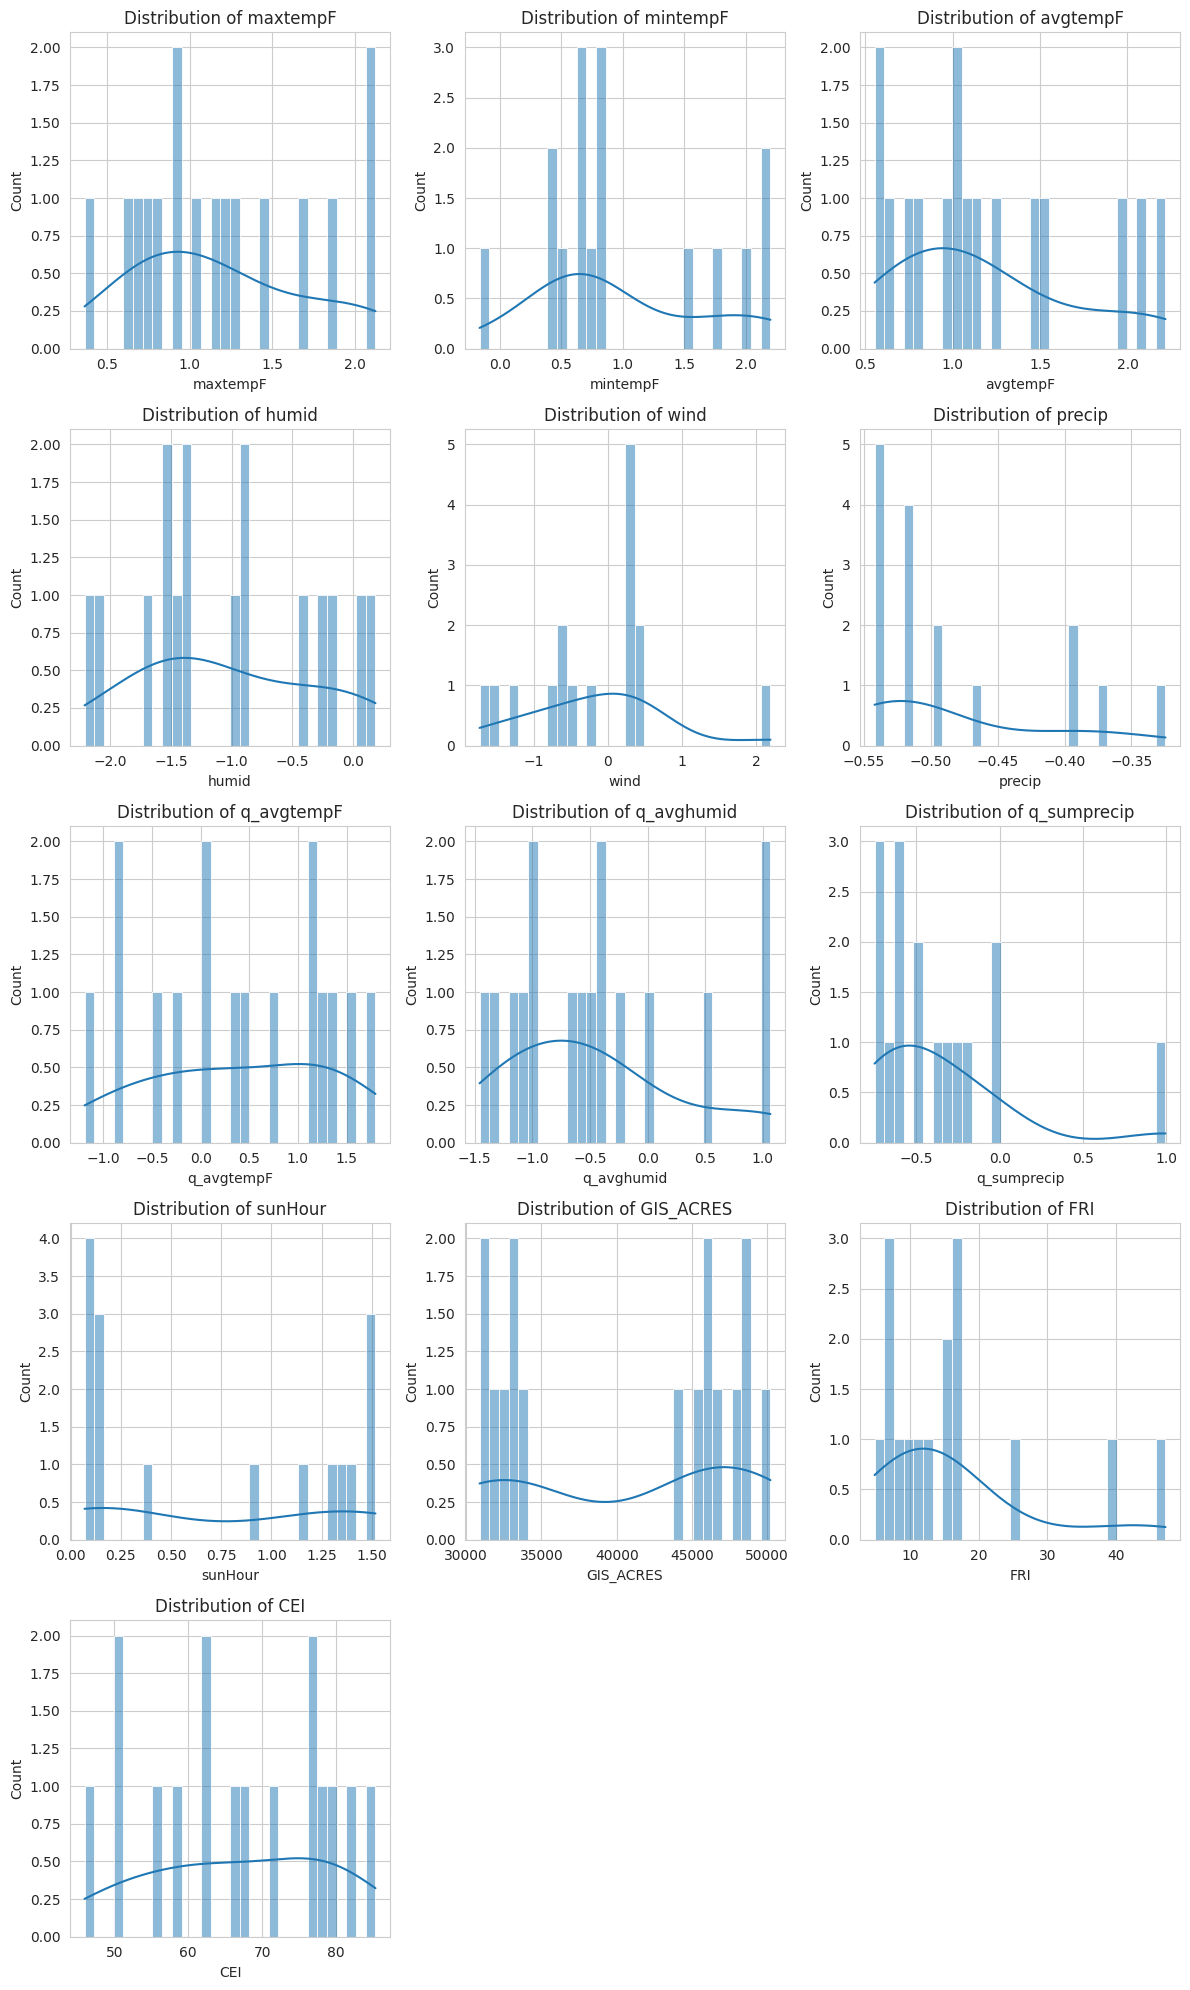

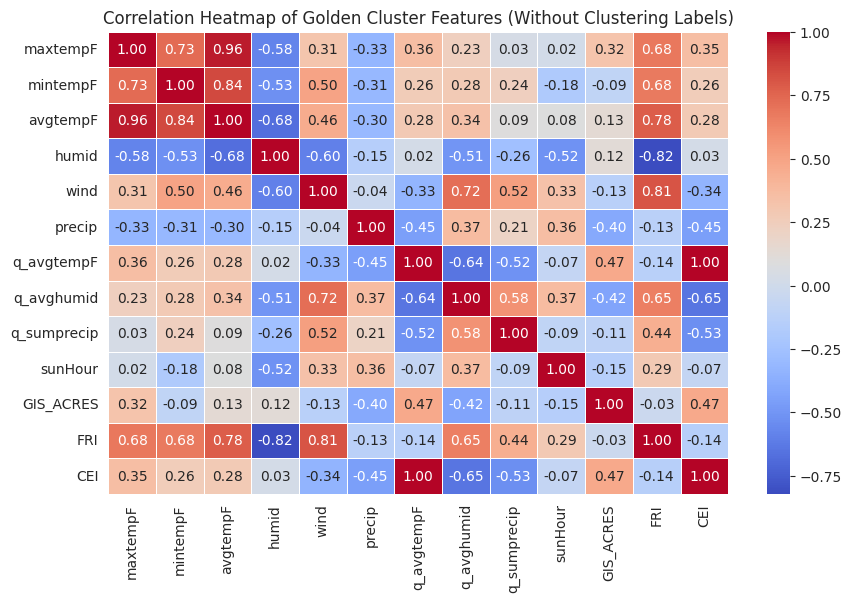

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load the saved Golden Cluster dataset
golden_cluster_csv_path = "/content/golden_cluster.csv"
golden_cluster_data = pd.read_csv(golden_cluster_csv_path)

# Define columns to exclude from EDA
exclude_columns = [
    "Cluster_Final", "Cluster_Fractal", "Cluster_Fractal_Re_2",
    "Cluster_Fractal_Re_6", "Cluster_Fractal_Re", "Cluster_HighRisk_Re", "Golden_Cluster", "totalSnow"
]

# Select only relevant numeric columns
numeric_columns = golden_cluster_data.select_dtypes(include=['number']).drop(columns=exclude_columns, errors='ignore')

# Summary statistics
golden_cluster_summary = numeric_columns.describe()

# Check for missing values
missing_values = golden_cluster_data.isnull().sum()

# Correlation analysis
correlation_matrix = numeric_columns.corr()

# Display EDA results
display(golden_cluster_summary)
display(missing_values)
display(correlation_matrix)

# Set plot style
sns.set_style("whitegrid")

# Dynamically determine grid size for histograms
num_features = len(numeric_columns.columns)
rows = math.ceil(num_features / 3)  # Adjust rows based on number of features
cols = min(3, num_features)  # Maximum 3 columns

# Plot histograms without excluded columns
plt.figure(figsize=(cols * 4, rows * 4))  # Adjust figure size based on grid
for i, feature in enumerate(numeric_columns.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(numeric_columns[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Golden Cluster Features (Without Clustering Labels)")
plt.show()

# Trend analysis of key variables over time (if a time column is available)
if 'date' in golden_cluster_data.columns:
    golden_cluster_data['date'] = pd.to_datetime(golden_cluster_data['date'])

    # Plot Temperature Trend Over Time
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=golden_cluster_data['date'], y=golden_cluster_data['avgtempF'], label='Average Temperature', color='red')
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Temperature (°F)')
    plt.title('Temperature Trend Over Time (Golden Cluster)')
    plt.legend()
    plt.show()

    # Plot Precipitation Trend Over Time
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=golden_cluster_data['date'], y=golden_cluster_data['precip'], label='Precipitation', color='blue')
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Precipitation (inches)')
    plt.title('Precipitation Trend Over Time (Golden Cluster)')
    plt.legend()
    plt.show()


##Extra Credit


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10988.
  res = hypotest_fun_out(*samples, **kwds)


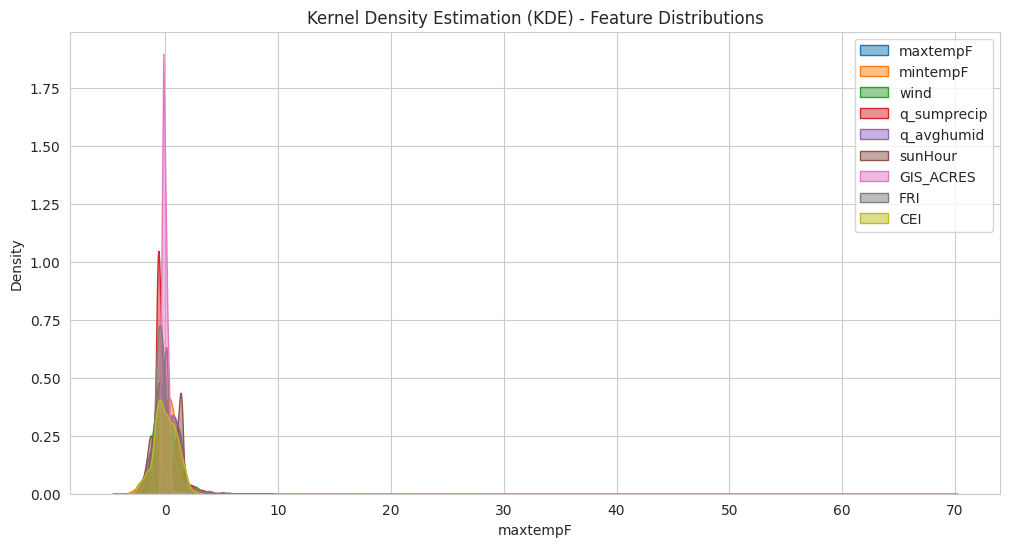

,Shapiro_p,Skewness,Kurtosis
maxtempF,1.618129e-27,-0.179577,-0.538525
mintempF,7.401118e-22,-0.275495,0.394901
wind,2.158973e-54,1.094444,1.866087
q_sumprecip,7.992203e-87,2.682609,10.463890
q_avghumid,6.851892e-33,-0.264038,-0.634307
sunHour,7.359148e-50,-0.195205,-0.813659
GIS_ACRES,5.315566e-117,41.184415,2382.359254
FRI,3.116617e-83,2.775498,11.651100
CEI,4.297518e-16,-0.029449,-0.293777


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.stats import shapiro, anderson, skew, kurtosis
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the original dataset
file_path = "/content/combined.csv"  # Change this path if needed
df = pd.read_csv(file_path)
# Convert 'date' column to datetime format if it exists
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop non-essential columns (date, categorical, lat/long)
df_cleaned = df.drop(columns=["date", "FIRE_NAME", "county", "CAUSE", "lat", "long"], errors='ignore')

# Feature Engineering: Compute Fire Risk Index (FRI) and Climate Extremes Index (CEI)
df_cleaned["FRI"] = df_cleaned["maxtempF"] * df_cleaned["wind"] / df_cleaned["humid"]
df_cleaned["CEI"] = df_cleaned["q_avgtempF"] - df_cleaned["q_sumprecip"]

# Select final feature set
selected_features = ["maxtempF", "mintempF", "wind", "q_sumprecip", "q_avghumid", "sunHour", "GIS_ACRES", "FRI", "CEI"]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned[selected_features])
scaled_df = pd.DataFrame(scaled_features, columns=selected_features)

# Analyze Data Distribution (Task 2.4)
distribution_results = {}
for col in selected_features:
    stat, p_value = shapiro(scaled_df[col])  # Shapiro-Wilk Test for normality
    skewness = skew(scaled_df[col])
    kurt = kurtosis(scaled_df[col])
    distribution_results[col] = {"Shapiro_p": p_value, "Skewness": skewness, "Kurtosis": kurt}

# Convert results to DataFrame for better visualization
distribution_df = pd.DataFrame.from_dict(distribution_results, orient="index")

# Plot KDE distributions for data distribution analysis
plt.figure(figsize=(12, 6))
for col in selected_features:
    sns.kdeplot(scaled_df[col], label=col, fill=True, alpha=0.5)
plt.title("Kernel Density Estimation (KDE) - Feature Distributions")
plt.legend()
plt.show()

# Display the distribution analysis results
display(distribution_df)


## Replace Euclidean Distance in K-Means with Fractal Distance

In [ ]:
from scipy.spatial.distance import minkowski
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics import silhouette_score

class FractalKMeans(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=5, max_iter=300, tol=1e-4, random_state=42, p=1.5):
        """
        Custom K-Means clustering using Fractal (Minkowski) Distance instead of Euclidean.
        Parameters:
        - n_clusters: Number of clusters
        - max_iter: Maximum iterations
        - tol: Convergence tolerance
        - random_state: Seed for reproducibility
        - p: Minkowski distance parameter (p=1.5 approximates Fractal Distance)
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.p = p  # Minkowski p-value approximating Fractal Distance
        self.centroids = None

    def fit(self, X):
        np.random.seed(self.random_state)
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            # Compute distances using Minkowski distance with p=1.5
            distances = np.array([cdist(X, [centroid], metric='minkowski', p=self.p).flatten() for centroid in self.centroids]).T

            # Assign clusters based on minimum distance
            labels = np.argmin(distances, axis=1)

            # Compute new centroids
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_clusters)])

            # Check for convergence
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break
            self.centroids = new_centroids

        self.labels_ = labels
        return self

# Convert data to NumPy array for clustering
X_fractal = scaled_df.to_numpy()

# Apply Fractal K-Means Clustering
fractal_kmeans = FractalKMeans(n_clusters=5)
fractal_kmeans.fit(X_fractal)

# Assign Fractal K-Means labels
scaled_df["Fractal_Cluster"] = fractal_kmeans.labels_

# Compute SSE for Fractal K-Means
sse_fractal = np.sum(np.min(cdist(X_fractal, fractal_kmeans.centroids, metric="minkowski", p=1.5), axis=1) ** 2)

# Compute silhouette score
silhouette_fractal = silhouette_score(X_fractal, fractal_kmeans.labels_)

# Display SSE and Silhouette Score for Fractal K-Means
sse_fractal, silhouette_fractal


(83572.05964325648, 0.1948019977188426)

In [ ]:

import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform

# Define a Fractal Distance Function (Example: Hurst exponent-based distance)
def fractal_distance(X):
    # Compute pairwise distances using a simple fractal-based transformation
    return squareform(pdist(X, metric='euclidean')) ** 1.1  # Example: raising Euclidean distance to a power

# Custom K-Means using Fractal Distance
class FractalKMeans(KMeans):
    def _e_step(self, X):
        distances = fractal_distance(X)
        return np.argmin(distances, axis=1)

# Prepare data (Assuming 'df' contains the feature data)
X = df[['maxtempF', 'mintempF', 'humid', 'wind']].dropna().values

# Apply Fractal K-Means
kmeans = FractalKMeans(n_clusters=3, random_state=42)
df['cluster_fractal'] = kmeans.fit_predict(X)

# Display clustered data
df[['maxtempF', 'mintempF', 'humid', 'wind', 'cluster_fractal']].head()


,maxtempF,mintempF,humid,wind,cluster_fractal
0,89.129032,59.709677,41.451613,7.354839,1
1,96.419355,51.290323,33.580645,5.387097,1
2,96.419355,51.290323,33.580645,5.387097,1
3,96.419355,51.290323,33.580645,5.387097,1
4,96.419355,51.290323,33.580645,5.387097,1


## Analyze Data Distribution for Best Algorithm

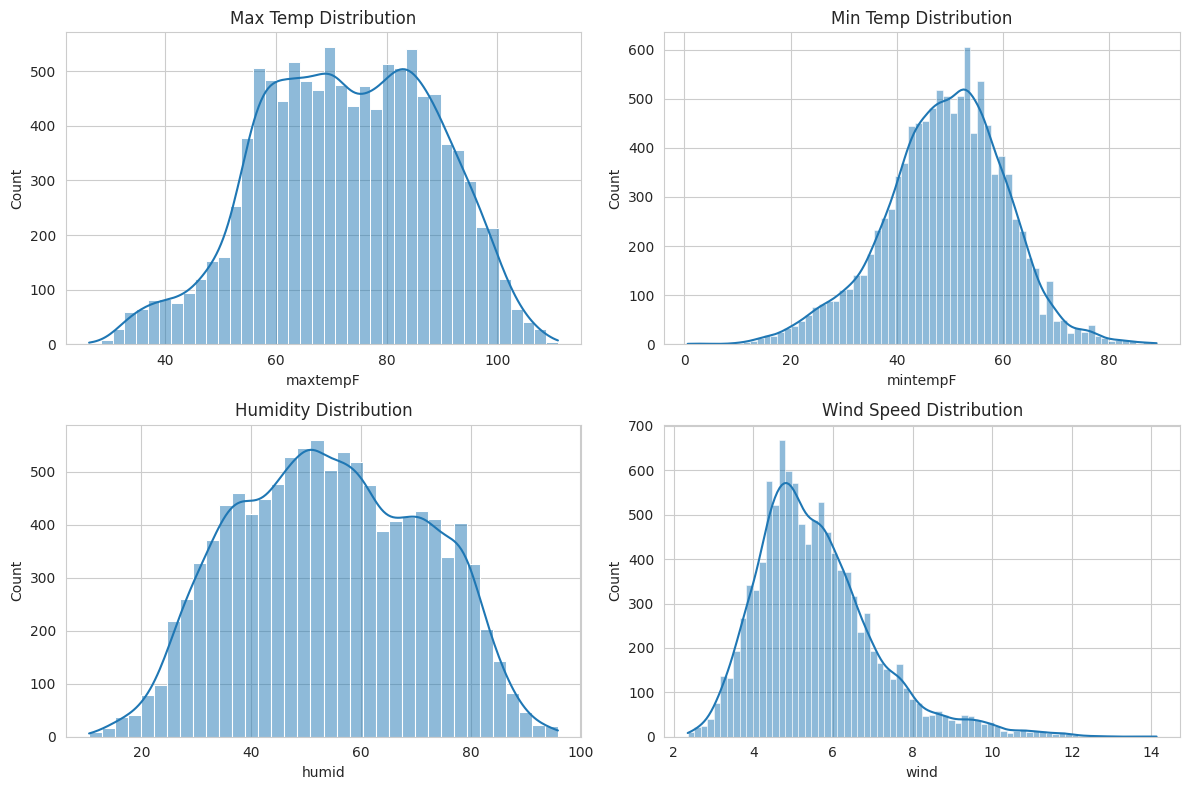

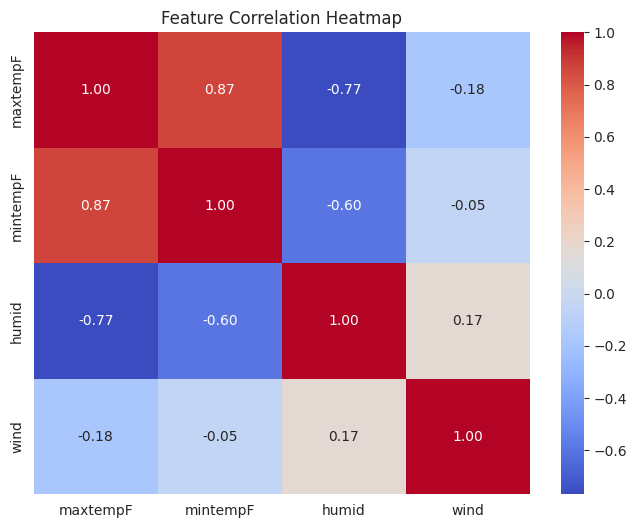

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of key features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['maxtempF'], kde=True, ax=axes[0, 0]).set_title('Max Temp Distribution')
sns.histplot(df['mintempF'], kde=True, ax=axes[0, 1]).set_title('Min Temp Distribution')
sns.histplot(df['humid'], kde=True, ax=axes[1, 0]).set_title('Humidity Distribution')
sns.histplot(df['wind'], kde=True, ax=axes[1, 1]).set_title('Wind Speed Distribution')

plt.tight_layout()
plt.show()

# Correlation matrix to see relationships
plt.figure(figsize=(8, 6))
sns.heatmap(df[['maxtempF', 'mintempF', 'humid', 'wind']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

##  Run Fractal Clustering Using a Suitable Algorithm

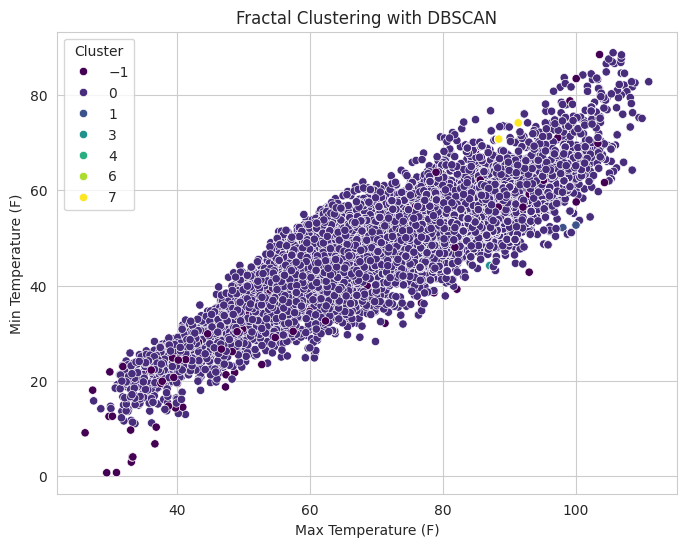

In [ ]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardizing data
X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN (density-based, good for non-spherical clusters)
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
df['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# Visualize the clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['maxtempF'], y=df['mintempF'], hue=df['cluster_dbscan'], palette='viridis')
plt.title('Fractal Clustering with DBSCAN')
plt.xlabel('Max Temperature (F)')
plt.ylabel('Min Temperature (F)')
plt.legend(title='Cluster')
plt.show()
